<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


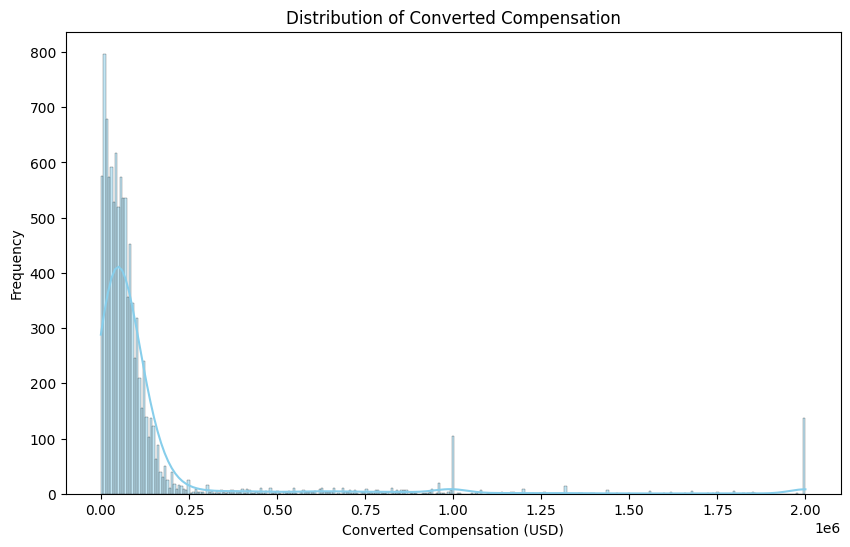

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns  
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], kde=True, color='skyblue')

plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')

# Show the plot
plt.show()


Plot the histogram for the column `ConvertedComp`.


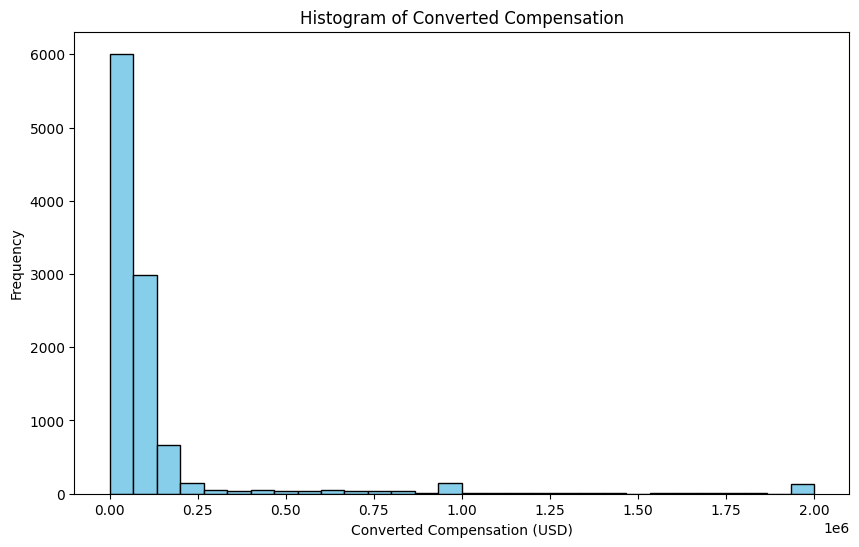

In [4]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show the plot
plt.show()



What is the median of the column `ConvertedComp`?


In [5]:
df["ConvertedComp"].median()

57745.0

In [20]:
df["Age"].median()

29.0

How many responders identified themselves only as a **Man**?


In [14]:
sum_of_gender_man = df.loc[df['Gender'] == 'Man', 'Gender'].count()
sum_of_gender_man

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


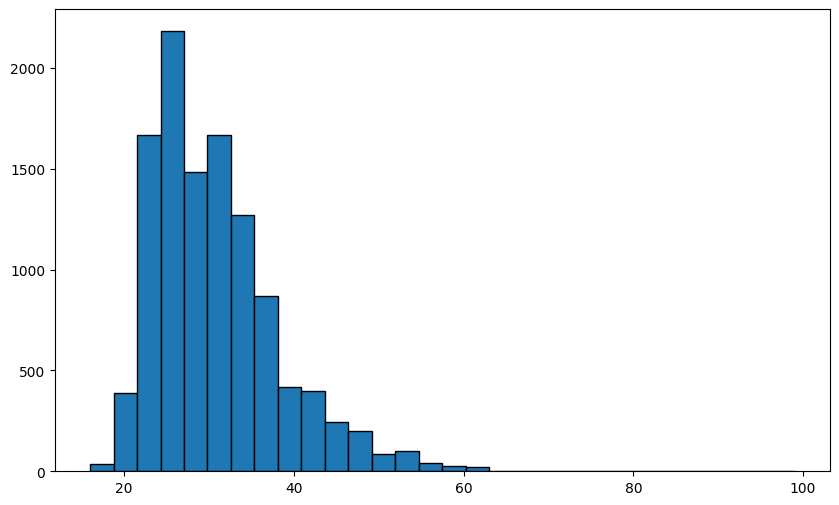

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='black')

plt.show()



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


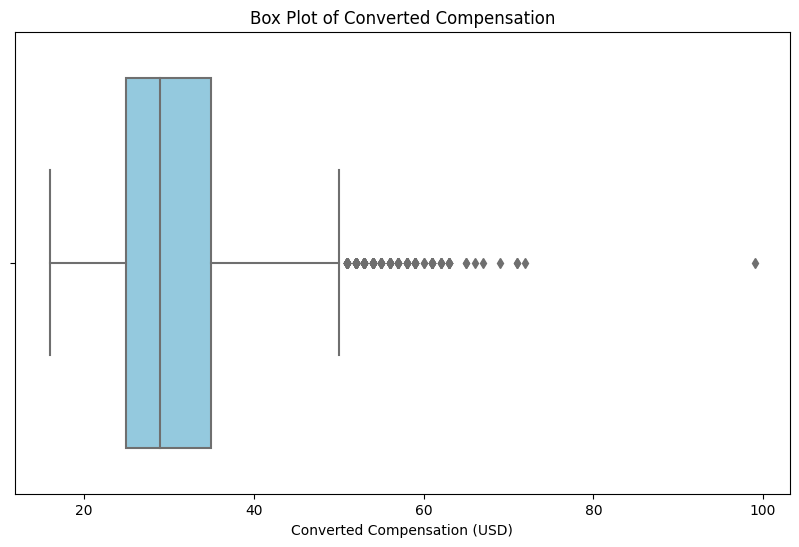

In [26]:
# Plot a box plot to visualize the distribution and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='skyblue')
plt.xlabel('Converted Compensation (USD)')
plt.title('Box Plot of Converted Compensation')
plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


Find out the upper and lower bounds.


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
outliers_count = len(df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)])

print(f'Interquartile Range (IQR): {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Number of outliers: {outliers_count}')


Interquartile Range (IQR): 73132.0
Lower Bound: -82830.0
Upper Bound: 209698.0
Number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [33]:
df_no_outliers= df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [36]:
median_no_outliers = df_no_outliers['ConvertedComp'].mean()

# Display the result
print(f'Median of ConvertedComp in df_no_outliers: {median_no_outliers}')


Median of ConvertedComp in df_no_outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [47]:
columns_of_interest = ["CompTotal", "CodeRevHrs", "Respondent", "WorkWeekHrs","ConvertedComp"]

# Find the correlation between 'Age' and the specified columns
correlation_with_age = df[columns_of_interest].corrwith(df['Age'])

# Display the correlation coefficients
print("Correlation with Age:")
print(correlation_with_age)


Correlation with Age:
CompTotal        0.006970
CodeRevHrs      -0.020469
Respondent       0.004041
WorkWeekHrs      0.036518
ConvertedComp    0.105386
dtype: float64


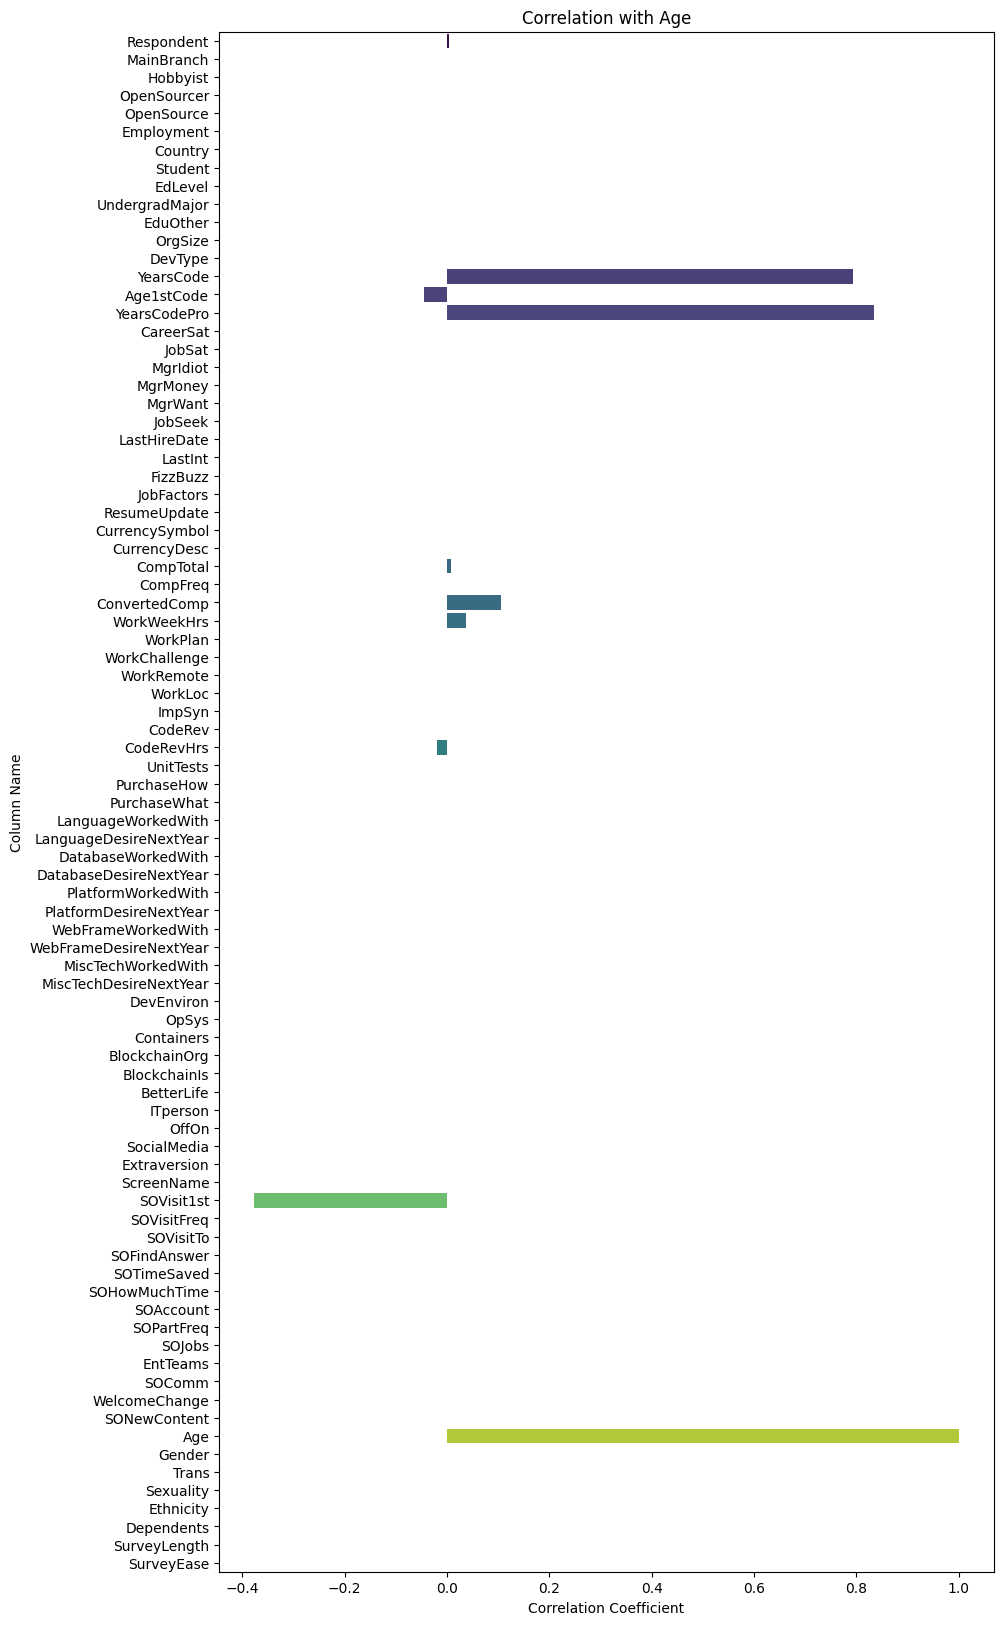

In [45]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Find the correlation between 'Age' and other numerical columns
correlation_matrix = df_numeric.corrwith(df_numeric['Age'])

# Display the correlation matrix
plt.figure(figsize=(10, 20))
sns.barplot(x=correlation_matrix.values, y=correlation_matrix.index, palette='viridis')
plt.title('Correlation with Age')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Column Name')
plt.show()



## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
